In [51]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
# Shows plots in jupyter notebook
%matplotlib inline
# Set plot style
sns.set(color_codes=True)

In [53]:
df = pd.read_csv('client_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [54]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [55]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [57]:
df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [58]:
price = pd.read_csv('price_data.csv')
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


STATISTICS

In [59]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [60]:
price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


EXPLORATORY DATA ANALYSIS

In [61]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_)

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )


def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [62]:
churn = df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

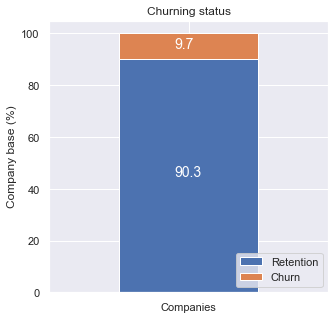

In [63]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

About 10% of the total customers have churned.

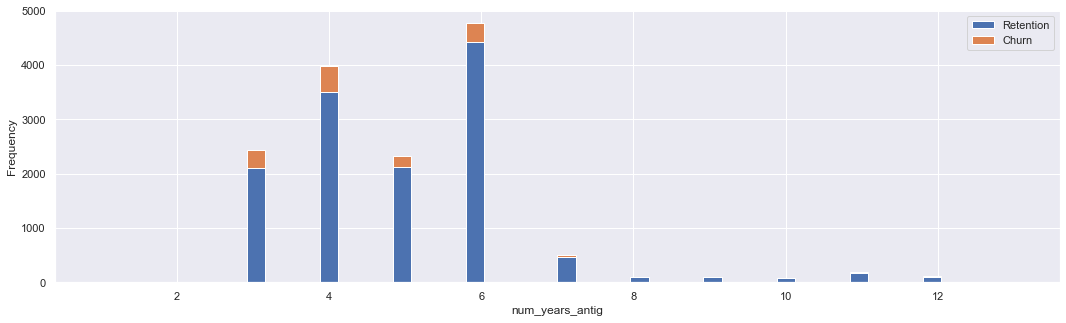

In [64]:
duration = df[['id', 'num_years_antig', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(duration, 'num_years_antig', axs)

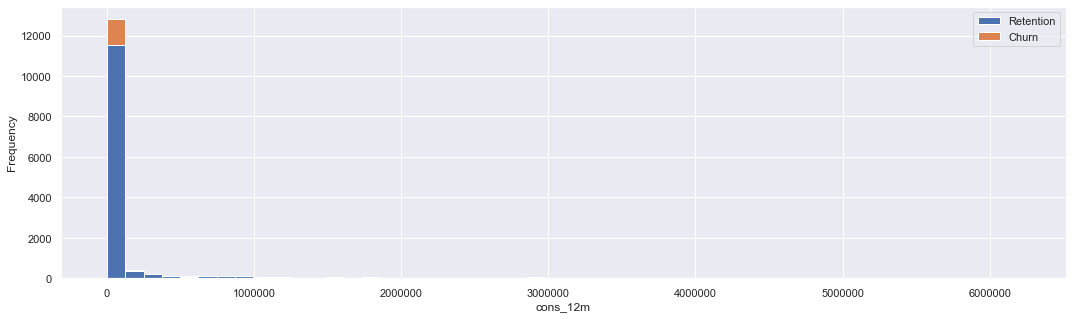

In [65]:
consumption = df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

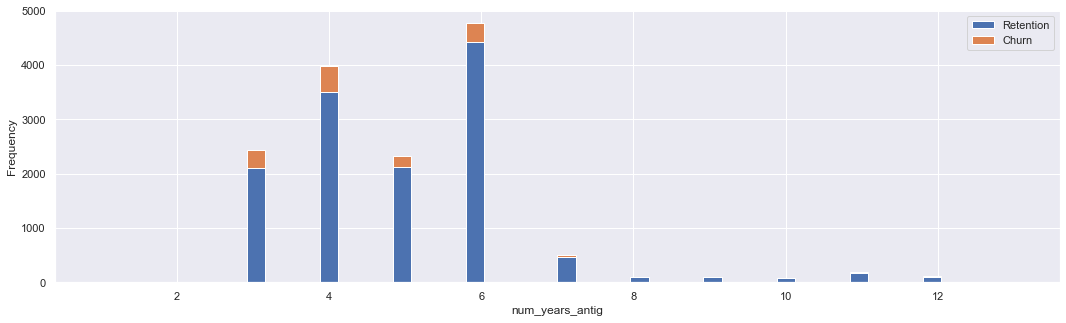

In [66]:
duration = df[['id', 'num_years_antig', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(duration, 'num_years_antig', axs)

Newer customers tend to churn more and drops drastically after 6 years

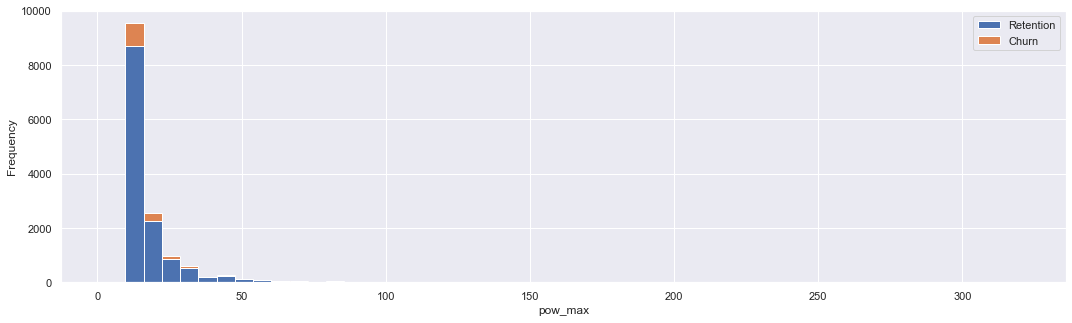

In [67]:
max_power = df[['id', 'pow_max', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(max_power, 'pow_max', axs)

Cosumers subscribed to lower power tend to churn more than otherwise

<AxesSubplot:>

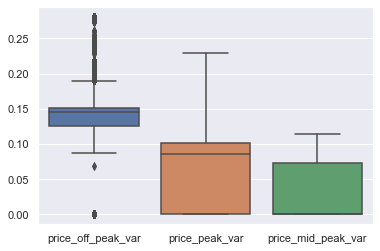

In [68]:
energy_price = price[['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']]

sns.boxplot(data=energy_price)

<AxesSubplot:>

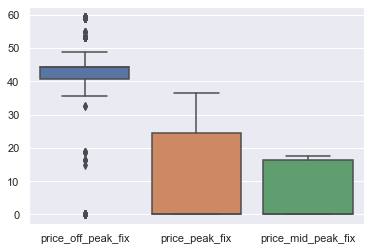

In [69]:
power_price = price[['id', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']]

sns.boxplot(data=power_price)

<AxesSubplot:xlabel='has_gas', ylabel='count'>

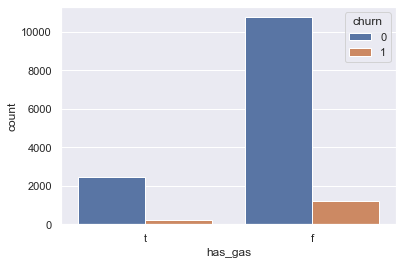

In [70]:
has_gas=df[['has_gas', 'churn']]
sns.countplot(data=has_gas, x='has_gas', hue='churn')

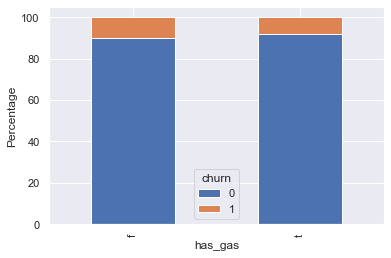

In [71]:
# count the frequency of each category and convert to percentage, grouped by the second column
counts = has_gas.groupby('has_gas')['churn'].value_counts(normalize=True) * 100

# plot the result with hue
counts.unstack().plot(kind='bar', stacked=True)
plt.ylabel('Percentage')
plt.show()

In [72]:
data=pd.merge(price,df,on='id')

In [73]:
data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0


In [74]:
data.isnull().sum()

id                                0
price_date                        0
price_off_peak_var                0
price_peak_var                    0
price_mid_peak_var                0
price_off_peak_fix                0
price_peak_fix                    0
price_mid_peak_fix                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                 

Feature Engineering

In [75]:
data['tenure'] = ((data['date_end'] - data['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [76]:
data.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143612
2,0.132656
4,0.125711
13,0.095238
5,0.085298
12,0.083333
6,0.080687
7,0.073354
11,0.063584


We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values

In [77]:
def convert_months(reference_date, data, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - data[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [78]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
data['months_activ'] = convert_months(reference_date, data, 'date_activ')
data['months_to_end'] = -convert_months(reference_date, data, 'date_end')
data['months_modif_prod'] = convert_months(reference_date, data, 'date_modif_prod')
data['months_renewal'] = convert_months(reference_date, data, 'date_renewal')

Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.


In [79]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

data= data.drop(columns=remove)
data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,net_margin,num_years_antig,origin_up,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,3,30,5,8,6
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,3,30,5,8,6
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,3,30,5,8,6
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,3,30,5,8,6
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,3,30,5,8,6


### Transforming Boolean data

#### has_gas

We simply want to transform this column from being categorical to being a binary flag

In [80]:
data['has_gas'] = data['has_gas'].replace(['t', 'f'], [1, 0])
data.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100437
1,0.081925


In [81]:
# Transform into categorical type
data['channel_sales'] = data['channel_sales'].astype('category')

# Let's see how many categories are within this column
data['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    80971
MISSING                             44684
lmkebamcaaclubfxadlmueccxoimlema    22105
usilxuppasemubllopkaafesmlibmsdf    16486
ewpakwlliwisiwduibdlfmalxowmwpci    10712
sddiedcslfslkckwlfkdpoeeailfpeds      131
epumfxlbckeskwekxbiuasklxalciiuu       36
fixdbufsefwooaasfcxdxadsiekoceaa       24
Name: channel_sales, dtype: int64

In [82]:
data = pd.get_dummies(data, columns=['channel_sales'], prefix='channel')
data = data.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,...,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,3,30,5,8,6,0,0,1,0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,3,30,5,8,6,0,0,1,0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,3,30,5,8,6,0,0,1,0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,3576,0,...,3,30,5,8,6,0,0,1,0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,3576,0,...,3,30,5,8,6,0,0,1,0,0


In [83]:
data = pd.get_dummies(data, columns=['origin_up'], prefix='origin_up')
data = data.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,8,6,0,0,1,0,0,0,1,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,8,6,0,0,1,0,0,0,1,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3576,0,...,8,6,0,0,1,0,0,0,1,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,3576,0,...,8,6,0,0,1,0,0,0,1,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,3576,0,...,8,6,0,0,1,0,0,0,1,0


In [84]:
data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
count,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,1.751490e+05,1.751490e+05,175149.000000,175149.000000,...,175149.000000,175149.000000,175149.00000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000
mean,0.142331,0.052059,0.028270,42.929009,9.458953,6.096434,1.592606e+05,2.808072e+04,16095.518404,1868.343884,...,35.474470,4.907210,0.25512,0.061159,0.462298,0.126207,0.094126,0.294052,0.215571,0.485792
std,0.023340,0.050286,0.036065,4.620531,12.133202,7.822250,5.735413e+05,1.629400e+05,64376.741908,2387.560169,...,30.249806,3.787411,0.43593,0.239623,0.498578,0.332083,0.292004,0.455617,0.411219,0.499800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126595,0.000000,0.000000,40.728885,0.000000,0.000000,5.674000e+03,0.000000e+00,0.000000,494.980000,...,6.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000,1.411500e+04,0.000000e+00,792.000000,1112.610000,...,30.000000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.151635,0.102114,0.072900,44.444710,24.339581,16.226389,4.076300e+04,0.000000e+00,3383.000000,2400.350000,...,64.000000,8.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221,6.207104e+06,4.154590e+06,771203.000000,82902.830000,...,151.000000,30.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
# Apply log10 transformation to remove skewness
data["cons_12m"] = np.log10(data["cons_12m"] + 1)
data["cons_gas_12m"] = np.log10(data["cons_gas_12m"] + 1)
data["cons_last_month"] = np.log10(data["cons_last_month"] + 1)
data["forecast_cons_12m"] = np.log10(data["forecast_cons_12m"] + 1)
data["forecast_cons_year"] = np.log10(data["forecast_cons_year"] + 1)
data["forecast_meter_rent_12m"] = np.log10(data["forecast_meter_rent_12m"] + 1)
data["imp_cons"] = np.log10(data["imp_cons"] + 1)

In [86]:
data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
count,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,...,175149.000000,175149.000000,175149.00000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000
mean,0.142331,0.052059,0.028270,42.929009,9.458953,6.096434,4.223974,0.779107,2.264762,2.962138,...,35.474470,4.907210,0.25512,0.061159,0.462298,0.126207,0.094126,0.294052,0.215571,0.485792
std,0.023340,0.050286,0.036065,4.620531,12.133202,7.822250,0.884530,1.716895,1.769263,0.683576,...,30.249806,3.787411,0.43593,0.239623,0.498578,0.332083,0.292004,0.455617,0.411219,0.499800
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126595,0.000000,0.000000,40.728885,0.000000,0.000000,3.753966,0.000000,0.000000,2.695464,...,6.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000,4.149712,0.000000,2.899273,3.046733,...,30.000000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.151635,0.102114,0.072900,44.444710,24.339581,16.226389,4.610277,0.000000,3.529430,3.380455,...,64.000000,8.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221,6.792889,6.618528,5.887169,4.918575,...,151.000000,30.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
correlation = data.corr()

In [88]:
correlation

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
price_off_peak_var,1.000000,-0.297574,-0.585341,0.649460,-0.609277,-0.587580,-0.132258,-0.035118,-0.211667,0.088092,...,-0.110266,0.062864,-0.090927,0.019038,0.004011,0.017337,0.093694,0.123678,-0.075985,-0.051023
price_peak_var,-0.297574,1.000000,0.815970,-0.203555,0.803983,0.809048,0.273524,0.074476,0.395444,0.216101,...,0.045999,0.056405,0.018238,-0.018665,-0.018073,0.090939,-0.083916,-0.009641,0.054714,-0.037241
price_mid_peak_var,-0.585341,0.815970,1.000000,-0.281289,0.986979,0.990798,0.219373,0.073029,0.379917,0.191298,...,-0.000096,0.042585,-0.011128,-0.013346,0.056724,0.008303,-0.078253,-0.113258,0.052440,0.059589
price_off_peak_fix,0.649460,-0.203555,-0.281289,1.000000,-0.222916,-0.325374,-0.130531,-0.019980,-0.130829,0.164415,...,-0.084839,0.021245,-0.053910,0.013014,0.020058,-0.012316,0.049392,0.056554,0.006459,-0.058533
price_peak_fix,-0.609277,0.803983,0.986979,-0.222916,1.000000,0.974224,0.209527,0.070403,0.376971,0.174857,...,0.018706,0.032673,0.008943,-0.014402,0.042501,0.007916,-0.082667,-0.115796,0.070752,0.046635
price_mid_peak_fix,-0.587580,0.809048,0.990798,-0.325374,0.974224,1.000000,0.232960,0.076560,0.385151,0.205703,...,-0.002608,0.041147,-0.018552,-0.010873,0.057839,0.013586,-0.077239,-0.106851,0.044555,0.060593
cons_12m,-0.132258,0.273524,0.219373,-0.130531,0.209527,0.232960,1.000000,0.209503,0.623502,0.557059,...,0.074220,0.081483,-0.084516,-0.064561,-0.021063,0.300034,-0.125852,0.032390,-0.026148,-0.006758
cons_gas_12m,-0.035118,0.074476,0.073029,-0.019980,0.070403,0.076560,0.209503,1.000000,0.171003,0.108398,...,0.019327,-0.005383,0.030707,-0.008171,-0.046553,0.048516,-0.013907,0.000543,0.001650,-0.003053
cons_last_month,-0.211667,0.395444,0.379917,-0.130829,0.376971,0.385151,0.623502,0.171003,1.000000,0.292616,...,0.065303,0.069970,-0.057971,-0.066078,0.010639,0.205693,-0.111037,-0.031596,-0.023471,0.049276
forecast_cons_12m,0.088092,0.216101,0.191298,0.164415,0.174857,0.205703,0.557059,0.108398,0.292616,1.000000,...,-0.104543,0.096022,-0.099935,-0.006708,0.055886,0.081508,-0.034338,-0.031320,-0.020063,0.045928


These variables showed high correlation with other variables

In [89]:
data= data.drop(columns=['num_years_antig','price_date','forecast_cons_year'])
data.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,cons_12m,cons_gas_12m,cons_last_month,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,3.553519,0.0,2.800029,...,8,6,0,0,1,0,0,0,1,0
1,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,3.553519,0.0,2.800029,...,8,6,0,0,1,0,0,0,1,0
2,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,3.553519,0.0,2.800029,...,8,6,0,0,1,0,0,0,1,0
3,038af19179925da21a25619c5a24b745,0.149626,0.0,0.0,44.266931,0.0,0.0,3.553519,0.0,2.800029,...,8,6,0,0,1,0,0,0,1,0
4,038af19179925da21a25619c5a24b745,0.149626,0.0,0.0,44.266931,0.0,0.0,3.553519,0.0,2.800029,...,8,6,0,0,1,0,0,0,1,0


MODELLING

In [90]:
from xgboost import XGBClassifier

In [91]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [92]:
# Separate target variable from independent variables
y = data['churn']
X = data.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(175149, 35)
(175149,)


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(122604, 35)
(122604,)
(52545, 35)
(52545,)


In [134]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [135]:

predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [136]:
y_test.value_counts()

0    47430
1     5115
Name: churn, dtype: int64

In [137]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 3498
False positives: 14
True negatives: 47416
False negatives: 1617

Accuracy: 0.9689599390998193
Precision: 0.9960136674259681
Recall: 0.6838709677419355


 So overall, we're able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners and non-churners.

A simple way of understanding the results of a model is to look at feature importances. Feature importances indicate the importance of a feature within the predictive model

In [138]:
feature_importances = pd.DataFrame({'features': X_train.columns,'importance': model.feature_importances_}).sort_values(by='importance', ascending=True).reset_index()


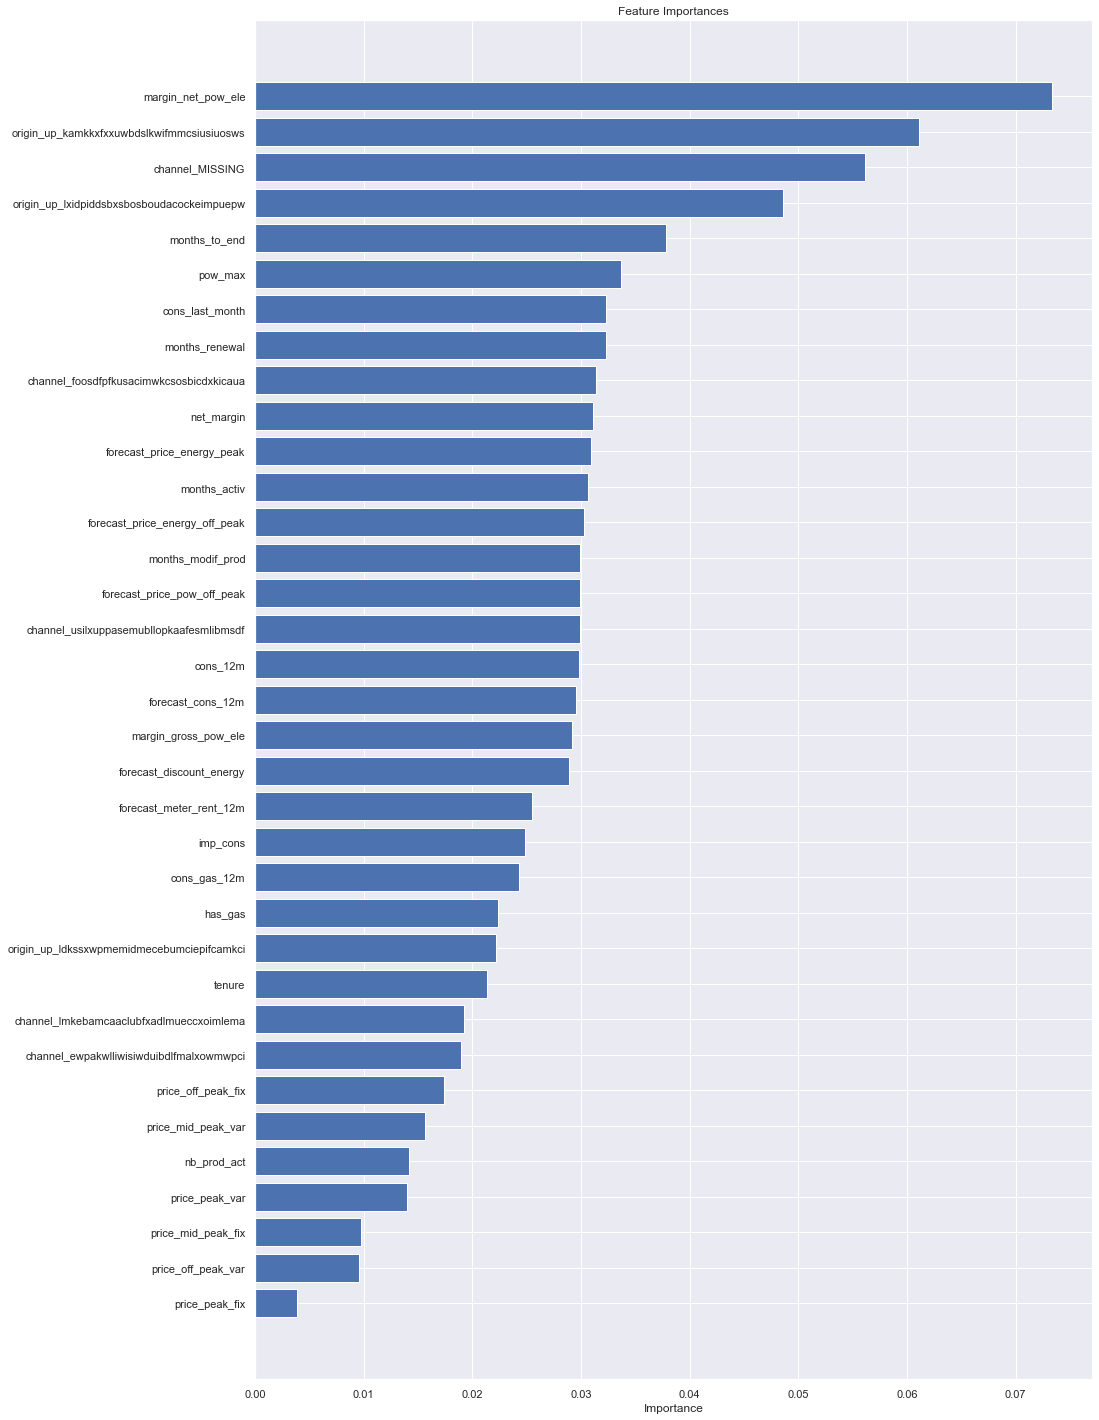

In [139]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
- Our price sensitivity features are scattered around but are not the main driver for a customer churning